In [ ]:
# Move the load data function to the functions.py file
# You should be able to pass in any dataset you want to run the model on
# Separation between data -> block GA -> model GA
# Very basic model can be used to solve Gibbon data
# Idea is to produce unique, high performing blocks that can potentially be genralised to any image dataset
# Or at the very least have a surrogate to dictate the best blocks for a given dataset

In [ ]:
from block_cnn import BlockNEAT
import pprint
import numpy as np
from copy import deepcopy
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import plot_model

In [ ]:
my_class = BlockNEAT('/Users/Donovan/Documents/Masters/masters-ed02/clean_code/gblock/parameters.yaml')

In [ ]:
(X_train, Y_train), (X_test, Y_test) = my_class.load_data(use_case = 'mnist')

In [ ]:
population = my_class.generate_initial_population('/Users/Donovan/Documents/Masters/masters-ed02/clean_code/gblock/minimal_individual_structure.yaml')
pprint.pprint(population)

In [ ]:
individual_1 = population['individual_1']

np.random.seed(42)

for i in range(50):
    r = np.random.random()
    print(r)
    pprint.pprint(individual_1)
    if i < 10:

        if r < 0.5:
            individual_c = my_class.mutate_add_connection(individual_1)

            if individual_c != None:
                individual_1 = individual_c

        else:
            individual_n = my_class.mutate_add_node(individual_1)

            if individual_n != None:
                individual_1 = individual_n

    else:
        if r < 1/3:
            individual_c = my_class.mutate_add_connection(individual_1)

            if individual_c != None:
                individual_1 = individual_c

        elif r > 2/3:
            individual_n = my_class.mutate_add_node(individual_1)

            if individual_n != None:
                individual_1 = individual_n

        else:
            individual_s = my_class.mutate_switch_connection(individual_1)

            if individual_s != None:
                individual_1 = individual_s

In [ ]:
layered_individual_1 = my_class.build_layers(individual_1, inputs = Input(shape = (28, 28, 1), name = 'node_i'))
pprint.pprint(layered_individual_1)

In [ ]:
layered_individual_1_copy = deepcopy(layered_individual_1)
block_individual_1 = my_class.build_block(layered_individual_1_copy, node = 'node_input', valid_nodes = None, visited_nodes = []) 
pprint.pprint(block_individual_1)

In [ ]:
inputs = block_individual_1['nodes']['node_input']['layer']

flatten = Flatten()(block_individual_1['nodes']['node_output']['layer'])
outputs = Dense(10, activation="softmax")(flatten)



model = Model(inputs = inputs, outputs = outputs, name = 'block_cnn')

In [ ]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
offsprings = my_class.crossover([individual_1, individual_1])
pprint.pprint(offsprings)

In [ ]:
def rapid_mutation(individual, r, switch):

    if not switch:

        if r < 0.5:
            individual_c = my_class.mutate_add_connection(individual)

            if individual_c != None:
                individual = individual_c

        else:
            individual_n = my_class.mutate_add_node(individual)

            if individual_n != None:
                individual = individual_n

    else:
        if r < 1/3:
            individual_c = my_class.mutate_add_connection(individual)

            if individual_c != None:
                individual = individual_c

        elif r > 2/3:
            individual_n = my_class.mutate_add_node(individual)

            if individual_n != None:
                individual = individual_n

        else:
            individual_s = my_class.mutate_switch_connection(individual)

            if individual_s != None:
                individual = individual_s

    return individual

In [ ]:
individual_1 = deepcopy(population['individual_1'])
individual_2 = deepcopy(population['individual_1'])

compat = []

c1_all = []
c2_all = []
c3_all = []

switch1 = False
switch2 = False

for i in range(100):

    if i > 10:
        switch1 = np.random.random() < 0.5
        switch2 = np.random.random() < 0.5

    individual_1 = rapid_mutation(individual_1, np.random.random(), switch1)
    individual_2 = rapid_mutation(individual_2, np.random.random(), switch2)

    c1 = np.random.random()
    c2 = np.random.random()
    c3 = np.random.random()

    c1_all.append(c1)
    c2_all.append(c2)
    c3_all.append(c3)

    compat.append(my_class.compatibility_distance(c1, c2, c3, individual_1, individual_2))


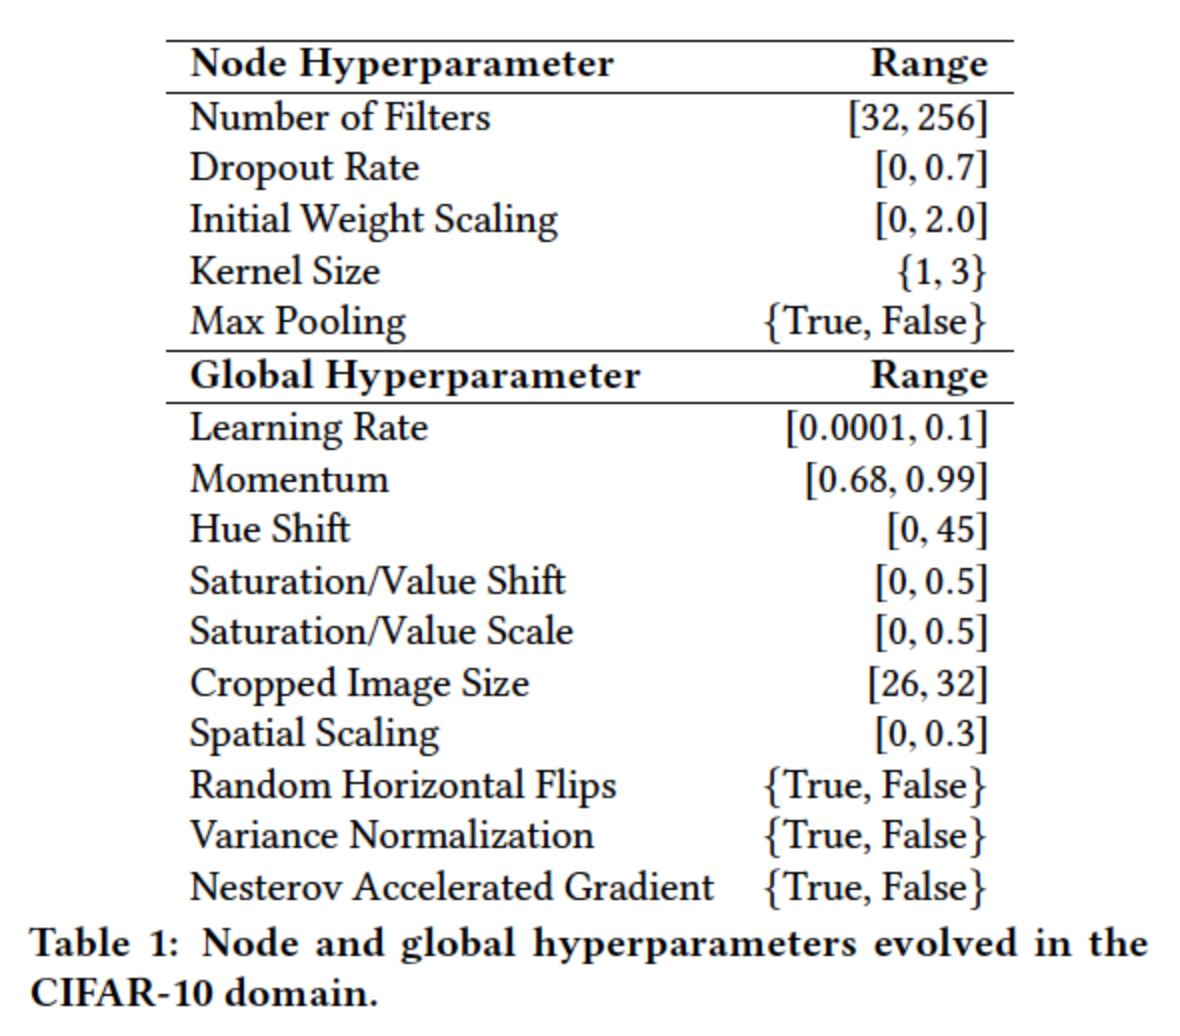